# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

human_files_count = len(human_files)
dog_files_count   = len(dog_files)

# print number of images in each dataset
print('There are %d total human images.' % human_files_count)
print('There are %d total dog images.' % dog_files_count)

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


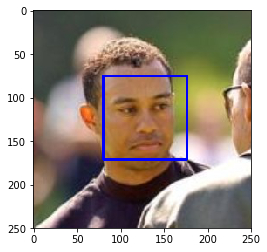

In [2]:
import random
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
random_number = random.randint(0, human_files_count)
img = cv2.imread(human_files[random_number])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
<br>
Humans in human files : 98%
<br>
Humans in dog files: 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

def get_percentage_of_humans_in_files(file_list):
    
    humans_found = 0
    
    for file in tqdm(file_list):
        if face_detector(file) is True:
            humans_found += 1
    
    percentage_of_humans_found = (humans_found / len(file_list)) * 100
    
    return percentage_of_humans_found
    

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# human_found_in_human_files = 0
# for file in tqdm(human_files_short):
#     if face_detector(file) is True:
#         human_found_in_human_files += 1

# human_found_in_dog_files = 0
# for file in tqdm(dog_files_short):
#     if face_detector(file) is True:
#         human_found_in_dog_files += 1
        
humans_in_human_files = get_percentage_of_humans_in_files(human_files_short)
humans_in_dog_files = get_percentage_of_humans_in_files(dog_files_short)
        
# print("Humans in human files : {}%".format(human_found_in_human_files))
# print("Humans in dog files: {}%".format(human_found_in_dog_files))

print()
print("Humans in human files : {}%".format(humans_in_human_files))
print("Humans in human files : {}%".format(humans_in_dog_files))


        


100%|██████████| 100/100 [00:29<00:00,  7.26it/s]


Humans in human files : 98.0%
Humans in human files : 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

# VGG16

In [7]:
# dir(models)

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

show_image = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # step 1: define transform
    transform = transforms.Compose([transforms.Resize(256),             #[2]
                                    transforms.CenterCrop(224),         #[3]
                                    transforms.ToTensor(),              #[4]
                                    transforms.Normalize(               #[5]
                                        mean=[0.485, 0.456, 0.406],     #[6]
                                        std=[0.229, 0.224, 0.225]       #[7]
                                    )])


    # step 2: Open image file
    img = Image.open(img_path)
    
    if show_image:
        plt.imshow(img)
    
    
    # step 3: pre-process image
    img_t = transform(img)
    
    
    batch_t = torch.unsqueeze(img_t, 0)
    
    # step 4: perform inference
    
    # step 4.1: put model in eval mode
    VGG16.eval()
    
    if use_cuda:
            batch_t = batch_t.cuda()
    
    # step 4.2: carry out the inference
    out = VGG16(batch_t)
    
#     print(out)
    
    # step 4.3: get max index
    _, index = torch.max(out, 1)
    
#     percentage = F.softmax(out, dim=1)[0] * 100
 
#     print(percentage[index[0]].item())

#     print(index.item())
    
    return index.item() # predicted class index

/data/dog_images/train/103.Mastiff/Mastiff_06813.jpg
243


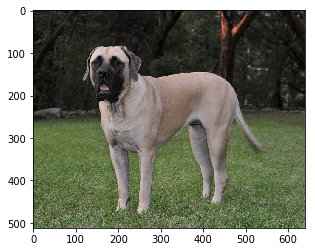

In [9]:
# Test VGG16_predict

file_count = 10
show_image = True

# dog_files_test = dog_files[:file_count]
dog_files_test = dog_files

# for i in range(file_count):
#     random_number = random.randint(0, len(dog_files_test))
#     file = dog_files_test[random_number]
#     print(file)
#     print(VGG16_predict(file))
    
random_number = random.randint(0, len(dog_files_test))
file = dog_files_test[random_number]
print(file)
print(VGG16_predict(file))

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    dog_detected = False
    
    index = VGG16_predict(img_path)
    
    if index in range(151, 268 + 1):
        dog_detected = True
    
    return dog_detected # true/false

/data/lfw/Bruno_Junquiera/Bruno_Junquiera_0001.jpg
795


False

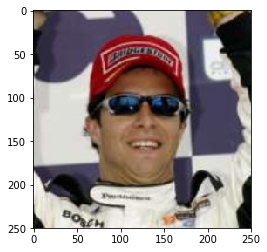

In [11]:
# Test dog_detector

file_count = 1000
show_image = True

# print(human_files.shape)
# print(dog_files.shape)
dog_files_test = np.concatenate((human_files, dog_files), axis=0)
# print(dog_files_test.shape)
    
random_number = random.randint(0, len(dog_files_test))
file = dog_files_test[random_number]
print(file)
print(VGG16_predict(file))
dog_detector(file)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
<br>
Dogs in human files : 0.0%
<br>
Dogs in dog files: 100.0%

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

from tqdm import tqdm

show_image = False

def get_percentage_of_dogs_in_files(file_list):
    
    dogs_found = 0
    
    for file in tqdm(file_list):
        if dog_detector(file) is True:
            dogs_found += 1
    
    percentage_of_dogs_found = (dogs_found / len(file_list)) * 100
    
    return percentage_of_dogs_found


dogs_in_human_files = get_percentage_of_dogs_in_files(human_files_short)
dogs_in_dog_files = get_percentage_of_dogs_in_files(dog_files_short)
        
print("Dogs in human files : {}%".format(dogs_in_human_files))
print("Dogs in dog files: {}%".format(dogs_in_dog_files))

100%|██████████| 100/100 [00:04<00:00, 22.49it/s]

Dogs in human files : 0.0%
Dogs in dog files: 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### (IMPLEMENTATION) Assess the Dog Detector with Inception-v3 (Optional)

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
<br>
Dogs in human files : 1.0%
<br>
Dogs in dog files: 100.0%

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


import torch
import torchvision.models as models

# define inception-v3 model
inception_v3 = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    inception_v3 = inception_v3.cuda()
    
# inception_v3

In [14]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

show_image = True

def inception_v3_predict(img_path):
    '''
    Use pre-trained inception_v3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to inception_v3 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # step 1: define transform
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # step 2: Open image file
    img = Image.open(img_path)
    
    if show_image:
        plt.imshow(img)
    
    
    # step 3: pre-process image
    img_tensor = transform(img)
    
    batch_t = img_tensor.unsqueeze(0)
    
    # step 4: perform inference
    
    ## step 4.1: put model in eval mode
    inception_v3.eval()
    
    ## step 4.2: carry out the inference
    if use_cuda:
            batch_t = batch_t.cuda()
            
    out = inception_v3(batch_t)
    
    ## step 4.3: get max index
    _, index = torch.max(out, 1)
    
    return index.item() # predicted class index

/data/dog_images/train/053.Cocker_spaniel/Cocker_spaniel_03772.jpg
265


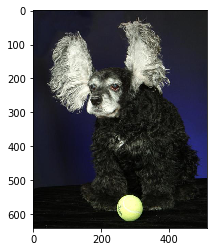

In [15]:
# Test inception_v3_predict

file_count = 10
show_image = True

dog_files_test = dog_files
    
random_number = random.randint(0, len(dog_files_test))
file = dog_files_test[random_number]
print(file)
print(inception_v3_predict(file))

In [16]:
## returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model="vgg"):
    ## TODO: Complete the function.
    
    dog_detected = False
    
    if model is "vgg":
#         print("Model: vgg-16")
        index = VGG16_predict(img_path)
    elif model is "inception":
#         print("Model: inception-v3")
        index = inception_v3_predict(img_path)
    else:
        print("Error: Invalid model")
        return None
    
    
    if index in range(151, 268 + 1):
        dog_detected = True
    
    return dog_detected # true/false

156


True

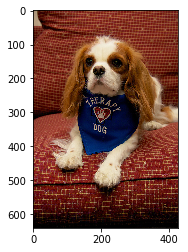

In [17]:
# Test dog_detector with inception model

file_count = 1000
show_image = True

# print(human_files.shape)
# print(dog_files.shape)
dog_files_test = dog_files
# print(dog_files_test.shape)
    
random_number = random.randint(0, len(dog_files_test))
file = dog_files_test[random_number]
# print(file)
print(VGG16_predict(file))
dog_detector(file, "inception")

In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

from tqdm import tqdm

show_image = False

def get_percentage_of_dogs_in_files(file_list):
    
    dogs_found = 0
    
    for file in tqdm(file_list):
        if dog_detector(file, "inception") is True:
            dogs_found += 1
    
    percentage_of_dogs_found = (dogs_found / len(file_list)) * 100
    
    return percentage_of_dogs_found


dogs_in_human_files = get_percentage_of_dogs_in_files(human_files_short)
dogs_in_dog_files = get_percentage_of_dogs_in_files(dog_files_short)
        
print("Dogs in human files : {}%".format(dogs_in_human_files))
print("Dogs in dog files: {}%".format(dogs_in_dog_files))

100%|██████████| 100/100 [00:04<00:00, 20.84it/s]

Dogs in human files : 1.0%
Dogs in dog files: 100.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import os
from torchvision import datasets, transforms, models

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

dog_dir = "/data/dog_images/"

# training_dir   = dog_dir + 'train'
# validation_dir = dog_dir + 'valid'
# testing_dir    = dog_dir + 'test'

# A cleaner way to set directory paths
training_dir   = os.path.join(dog_dir, 'train/')
validation_dir = os.path.join(dog_dir, 'valid/')
testing_dir    = os.path.join(dog_dir, 'test/')


cnn_model = "vgg"

def get_transforms(cnn_model="vgg", rotation=10):
    
    resize = None
    center_crop = None
    
    if cnn_model is "inception":
        
        print("CNN Model: inception-v3")
        
        resize      = 299
        center_crop = 299

    elif cnn_model is "vgg":
        
        print("CNN Model: vgg-16")
        
        resize      = 256
        center_crop = 224
        
    else:
        print("Error: Invalid Model... Using vgg-16")
        
        resize      = 256
        center_crop = 224

        
        
    training_transform = transforms.Compose([
            transforms.RandomResizedCrop(center_crop), # Yes, center_crop is used here
            transforms.CenterCrop(center_crop), 
            transforms.RandomHorizontalFlip(), # randomly flip and rotate horizontally
            transforms.RandomVerticalFlip(),   # randomly flip and rotate vertically
            transforms.RandomRotation(rotation),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    validation_transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(center_crop),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    testing_transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(center_crop),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


    return training_transform, validation_transform, testing_transform


# Define a transform to normalize the data
training_transform, validation_transform, testing_transform = get_transforms(cnn_model)
    
training_dataset   = datasets.ImageFolder(training_dir, transform=training_transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=validation_transform)
testing_dataset    = datasets.ImageFolder(testing_dir, transform=testing_transform)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# prepare data loaders (combine dataset and sampler)
training_loader   = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, num_workers=num_workers)

testing_loader    = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size, num_workers=num_workers)

loaders = {"train": training_loader, "valid": validation_loader, "test": testing_loader}

loaders_scratch = loaders

# print(loaders)

CNN Model: vgg-16


In [20]:
# # helper function to un-normalize and display an image
def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image, aspect='auto')  # convert from Tensor image

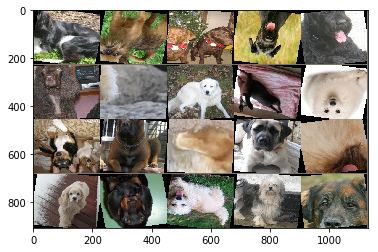

In [21]:
#training_loader
from torchvision import utils

## Run this to test your training loader
images, labels = next(iter(loaders['train']))

# Make a grid from batch
# show images
grid = utils.make_grid(images, nrow=5)
# grid.shape


imshow(grid)

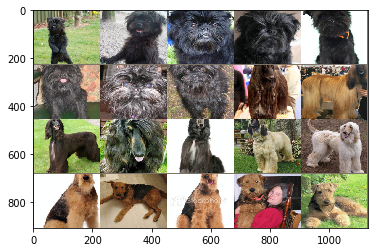

In [22]:
#validation_loader

## Run this to test your validation loader
images, labels = next(iter(loaders['valid']))
imshow(images[0])


# show images
grid = utils.make_grid(images, nrow=5)
# grid.shape


imshow(grid)

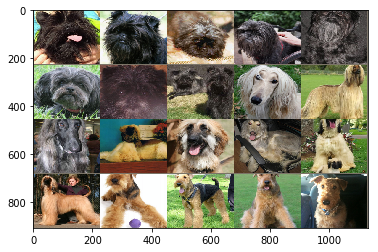

In [23]:
#testing_loader

## Run this to test your testing loader
images, labels = next(iter(loaders['test']))
imshow(images[0])

# show images
grid = utils.make_grid(images, nrow=5)
# grid.shape


imshow(grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
> 
> - I resized and cropped the images based on the model using the following references:
> - 1. vgg-16       : [pytorch.org/hub/pytorch_vision_vgg/](https://pytorch.org/hub/pytorch_vision_vgg/)
        -  **Resize**     = 224
        -  **CenterCrop** = 224
> - 2. inception-v3 : [pytorch.org/hub/pytorch_vision_inception_v3/](https://pytorch.org/hub/pytorch_vision_inception_v3/)
        -  **Resize**      = 299
        -  **CenterCrop** = 299

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
> Yes, I chose to augment the dataset: I chose random flips (both vertical and horizontal), and random rotations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [24]:
## Duplicate for testing
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self, model="vgg"):
        super(Net, self).__init__()
        
        self.input_size = None
#         self.center_crop = None
        self.input_dept = 3
    
        if model is "inception":

            print("CNN Model: inception-v3")

            self.input_size = 229
#             self.center_crop = 229

        elif model is "vgg":

            print("CNN Model: vgg-16")

            self.input_size = 224
#             self.input_size = 256
#             self.center_crop = 224

        else:
            print("Error: Invalid Model... Using vgg-16")

            self.input_size = 224
#             self.input_size = 256
#             self.center_crop = 224
            
        # convolutional layer (sees self.input_size x self.input_size x 3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
#         self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        
        
        # convolutional layer (sees 8x8x32 tensor)
#         self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        
#         linear layer (64 * 28 * 28 -> 500)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 133)
        # linear layer (500 -> 10)
#         self.fc3 = nn.Linear(512, 133)
        
        
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = self.pool(F.relu(self.conv3(x)))
#         x = self.pool(F.relu(self.conv4(x)))
        
#         x = self.pool(F.relu(self.conv5(x)))
       
        
        # flatten image input
        x = x.view(-1, 64 * 28 * 28)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
#         x = F.relu(self.fc2(x))
#         # add dropout layer
#         x = self.dropout(x)
#         # add 3rd hidden layer, with relu activation function
#         x = F.relu(self.fc3(x))
        # add dropout layer
#         x = self.dropout(x)
        # add 4th hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

CNN Model: vgg-16
Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [25]:
import torch.optim as optim

learn_rate = 0.01 # 0.001 was used prior when it started training

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=learn_rate)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learn_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [26]:
# Class that monitors average values
# Source: https://github.com/pytorch/examples/blob/master/imagenet/main.py

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [27]:
# Class that monitors progress of training values
# Source: https://github.com/pytorch/examples/blob/master/imagenet/main.py

class ProgressMeter(object):
    def __init__(self, num_batches, meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def display(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [28]:
# Class that calculates accuracy of training values
# Source: https://github.com/pytorch/examples/blob/master/imagenet/main.py


def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [29]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs = 100

from workspace_utils import active_session

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # update average validation loss 
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


with active_session():
    # train the model
    model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

    # load the model that got the best validation accuracy
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.878315 	Validation Loss: 4.843472
Validation loss decreased (inf --> 4.843472).  Saving model ...
Epoch: 2 	Training Loss: 4.825321 	Validation Loss: 4.748616
Validation loss decreased (4.843472 --> 4.748616).  Saving model ...
Epoch: 3 	Training Loss: 4.760816 	Validation Loss: 4.660520
Validation loss decreased (4.748616 --> 4.660520).  Saving model ...
Epoch: 4 	Training Loss: 4.662676 	Validation Loss: 4.560471
Validation loss decreased (4.660520 --> 4.560471).  Saving model ...
Epoch: 5 	Training Loss: 4.620002 	Validation Loss: 4.531781
Validation loss decreased (4.560471 --> 4.531781).  Saving model ...
Epoch: 6 	Training Loss: 4.588222 	Validation Loss: 4.494366
Validation loss decreased (4.531781 --> 4.494366).  Saving model ...
Epoch: 7 	Training Loss: 4.569080 	Validation Loss: 4.467656
Validation loss decreased (4.494366 --> 4.467656).  Saving model ...
Epoch: 8 	Training Loss: 4.543335 	Validation Loss: 4.470803
Epoch: 9 	Training Loss: 4.516150 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [30]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

with active_session():
    # call test function    
    test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.504025


Test Accuracy: 16% (141/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [31]:
## TODO: Specify data loaders

import os
from torchvision import datasets, transforms, models

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

dog_dir = "/data/dog_images/"

# A cleaner way to set directory paths
training_dir   = os.path.join(dog_dir, 'train/')
validation_dir = os.path.join(dog_dir, 'valid/')
testing_dir    = os.path.join(dog_dir, 'test/')


cnn_model = "vgg"


# Define a transform to normalize the data
training_transform, validation_transform, testing_transform = get_transforms(cnn_model)
    
training_dataset   = datasets.ImageFolder(training_dir, transform=training_transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=validation_transform)
testing_dataset    = datasets.ImageFolder(testing_dir, transform=testing_transform)

data_transfer = {"train": training_dataset, "valid": validation_dataset, "test": testing_dataset}

# print(data_transfer)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# prepare data loaders (combine dataset and sampler)
training_loader   = torch.utils.data.DataLoader(data_transfer['train'], batch_size=batch_size, shuffle=True, num_workers=num_workers)

validation_loader = torch.utils.data.DataLoader(data_transfer['valid'], batch_size=batch_size, num_workers=num_workers)

testing_loader    = torch.utils.data.DataLoader(data_transfer['test'], batch_size=batch_size, num_workers=num_workers)

loaders_transfer = {"train": training_loader, "valid": validation_loader, "test": testing_loader}

# print(loaders_transfer)


CNN Model: vgg-16


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [32]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# print(model_transfer)

for param in model_transfer.parameters():
    param.requires_grad = False
    
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_transfer.classifier[6].in_features

hid_units = model_transfer.classifier[6].out_features

classifier = nn.Sequential(nn.Linear(num_ftrs, hid_units),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(hid_units,512),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(512, 133))

model_transfer.classifier[6] = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

In [33]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I followed the pattern recomended by [cs231n](http://cs231n.github.io/transfer-learning/):
<br>
1. Choose a trained network
2. Freeze the parameters
3. Randomize the traning data as much as possible to prevent overfitting on the small and limited dataset
4. Add a final FC network to the end and train only those features
5. I added an FC to the final stage of classifier and was very impressed with the accuracy of 82%
<br>



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [34]:
import torch.optim as optim

learn_rate = 0.01

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=learn_rate)
optimizer_transfer = optim.SGD(model_transfer.classifier[6].parameters(), lr=learn_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [35]:
n_epochs = 50

with active_session():
    # train the model
    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

    # load the model that got the best validation accuracy (uncomment the line below)
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.823529 	Validation Loss: 4.567120
Validation loss decreased (inf --> 4.567120).  Saving model ...
Epoch: 2 	Training Loss: 4.391519 	Validation Loss: 3.287564
Validation loss decreased (4.567120 --> 3.287564).  Saving model ...
Epoch: 3 	Training Loss: 3.286308 	Validation Loss: 1.770177
Validation loss decreased (3.287564 --> 1.770177).  Saving model ...
Epoch: 4 	Training Loss: 2.562542 	Validation Loss: 1.238527
Validation loss decreased (1.770177 --> 1.238527).  Saving model ...
Epoch: 5 	Training Loss: 2.272255 	Validation Loss: 1.015143
Validation loss decreased (1.238527 --> 1.015143).  Saving model ...
Epoch: 6 	Training Loss: 2.136185 	Validation Loss: 0.869832
Validation loss decreased (1.015143 --> 0.869832).  Saving model ...
Epoch: 7 	Training Loss: 2.041106 	Validation Loss: 0.823178
Validation loss decreased (0.869832 --> 0.823178).  Saving model ...
Epoch: 8 	Training Loss: 2.011029 	Validation Loss: 0.769982
Validation loss decreased (0.82317

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [36]:
with active_session():
    test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.498571


Test Accuracy: 84% (707/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [40]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

show_image = True

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

# print(class_names)

# print(len(class_names))



def predict_breed_transfer(img_path, resize=254, center_crop=224):
    # load the image and return the predicted breed
    '''
    Use trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        string of the dog breed that is predicted by the model.
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # step 1: define transform
    transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(center_crop),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


    # step 2: Open image file
    img = Image.open(img_path)
    
    if show_image:
        plt.imshow(img)
    
    # step 3: pre-process image
    img_t = transform(img)
    
    batch_t = torch.unsqueeze(img_t, 0)
    
    # step 4: perform inference
    
    # step 4.1: put model in eval mode
    model_transfer.eval()
    
    if use_cuda:
            batch_t = batch_t.cuda()
    
    # step 4.2: carry out the inference
    out = model_transfer(batch_t)
    
    # step 4.3: get max index
    _, index = torch.max(out, 1)
    
    # step 5: return dog label using index
    dog_breed = class_names[index.item()]
    
    
    
    return dog_breed # predicted dog breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    header_string = None
    
    footer_string = None
    
    # step 1: Check if a dog is detected
    if (dog_detector(img_path) is True):
        
        dog_name = predict_breed_transfer(img_path)
        
        header_string = "Hello, doggy!!!\n"
        footer_string = "You must be a..." + dog_name
    
    # step 2: Check if a human is detected
    elif (face_detector(img_path) is True):
        
        dog_name = predict_breed_transfer(img_path)
        
        header_string = "Hello, human!!!\n"
        footer_string = "You look like a..." + dog_name
        
    # step 3: Neither dog nor human was detected, out put error message
    else:
        
        header_string = "Hello....\n"
        footer_string = "I have no idea what you are"
        
        
        
    title_string = header_string + footer_string
    
    img = Image.open(img_path)
    
    plt.title(title_string)
    plt.imshow(img)
    plt.show()
    
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
<br>
The output performed worse than I expected.
<br>
<br>
Three possible points for improvement:
<br>
1. Have better models for predicting humans
2. Train the dog network on some animals that aren't dogs
3. Have a wider variety of traning images for dogs that include mutts

There are 8 total my images.


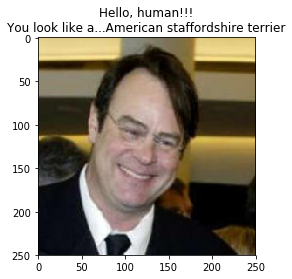

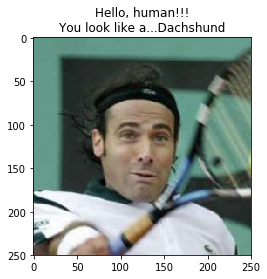

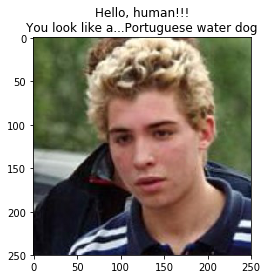

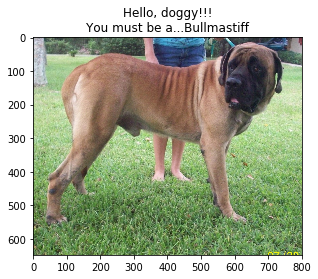

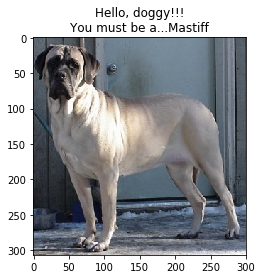

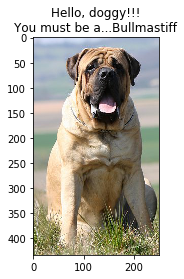

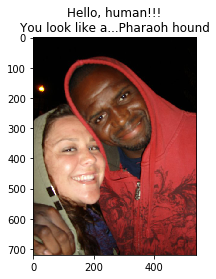

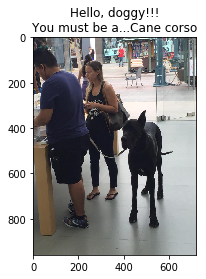

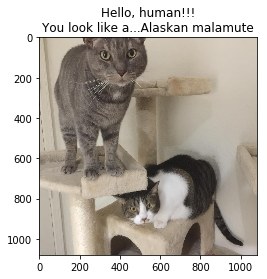

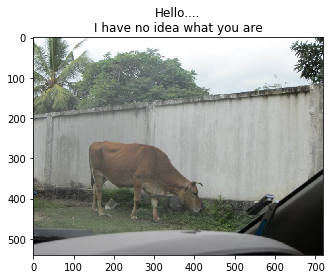

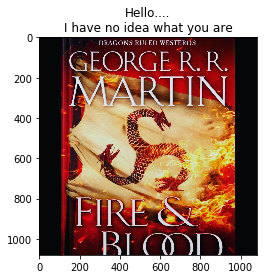

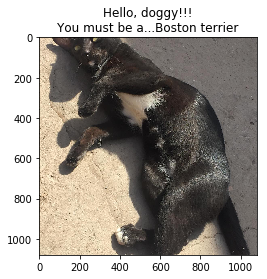

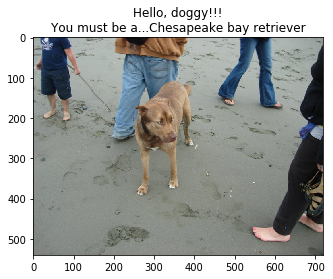

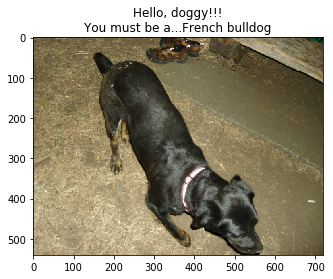

In [39]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

import numpy as np
from glob import glob

# load filenames for my images
my_files = np.array(glob("my_images/*"))

my_files_count = len(my_files)

# print number of images in each dataset
print('There are %d total my images.' % my_files_count)

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3], my_files)):
    run_app(file)